In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
airbnb_data = pd.read_csv("Airbnb_Open_Data.csv")

C:\Users\aayus\AppData\Local\Temp\ipykernel_52984\3377657565.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_data = pd.read_csv("Airbnb_Open_Data.csv")


In [121]:
airbnb_data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [122]:
# Replace incorrect neighborhood values with correct ones
airbnb_data['neighbourhood group'] = airbnb_data['neighbourhood group'].replace(['Brookln', 'brookln', 'manhatan'], ['Brooklyn', 'Brooklyn', 'Manhattan'])
airbnb_data['neighbourhood'] = airbnb_data['neighbourhood'].replace(['Brookln', 'brookln', 'manhatan'], ['Brooklyn', 'Brooklyn', 'Manhattan'])

# Verify the replacement
print(airbnb_data['neighbourhood group'].unique())
print(airbnb_data['neighbourhood'].unique())


['Brooklyn' 'Manhattan' 'Queens' nan 'Staten Island' 'Bronx']
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges' 'Queens Village' 'Rockaway Bea

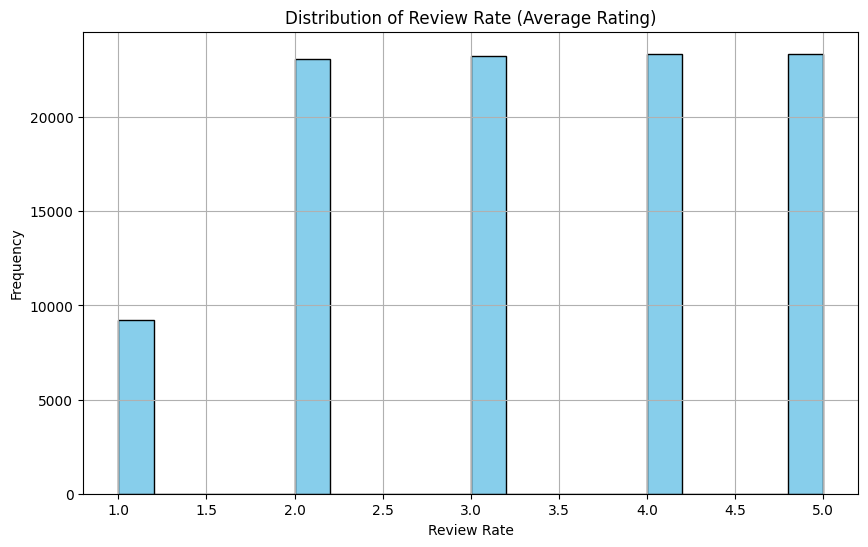

In [123]:
# 1. Distribution of Review Rate (Histogram)
plt.figure(figsize=(10, 6))
plt.hist(airbnb_data['review rate number'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Rate (Average Rating)')
plt.xlabel('Review Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


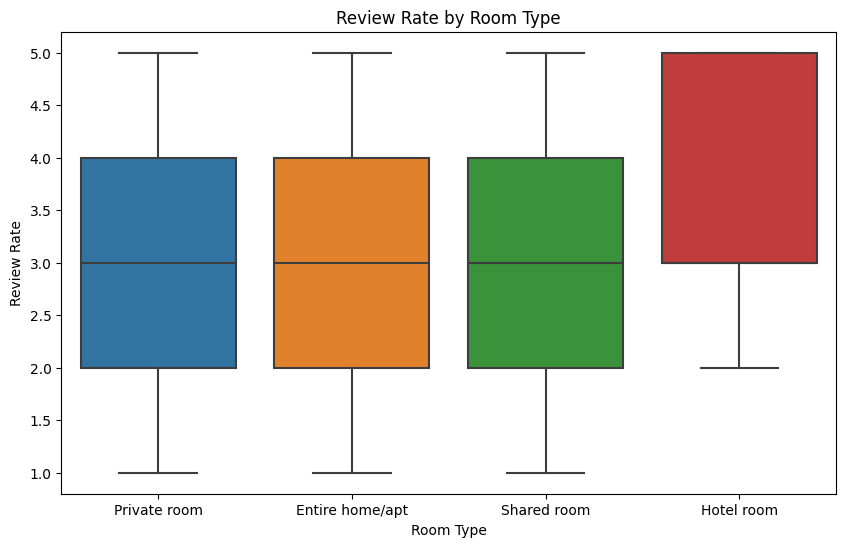

In [124]:
# 2. Box Plot of Review Rate by Room Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='review rate number', data=airbnb_data)
plt.title('Review Rate by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Review Rate')
plt.show()

In [125]:
# Clean up the 'price' and 'service fee' columns to remove non-numeric characters
airbnb_data['price'] = pd.to_numeric(airbnb_data['price'].replace('[\$,]', '', regex=True), errors='coerce')
airbnb_data['service fee'] = pd.to_numeric(airbnb_data['service fee'].replace('[\$,]', '', regex=True), errors='coerce')

# Correct misspellings in the 'neighbourhood group' column
airbnb_data['neighbourhood group'] = airbnb_data['neighbourhood group'].replace(['Brookln', 'brookln', 'manhatan'], ['Brooklyn', 'Brooklyn', 'Manhattan'])

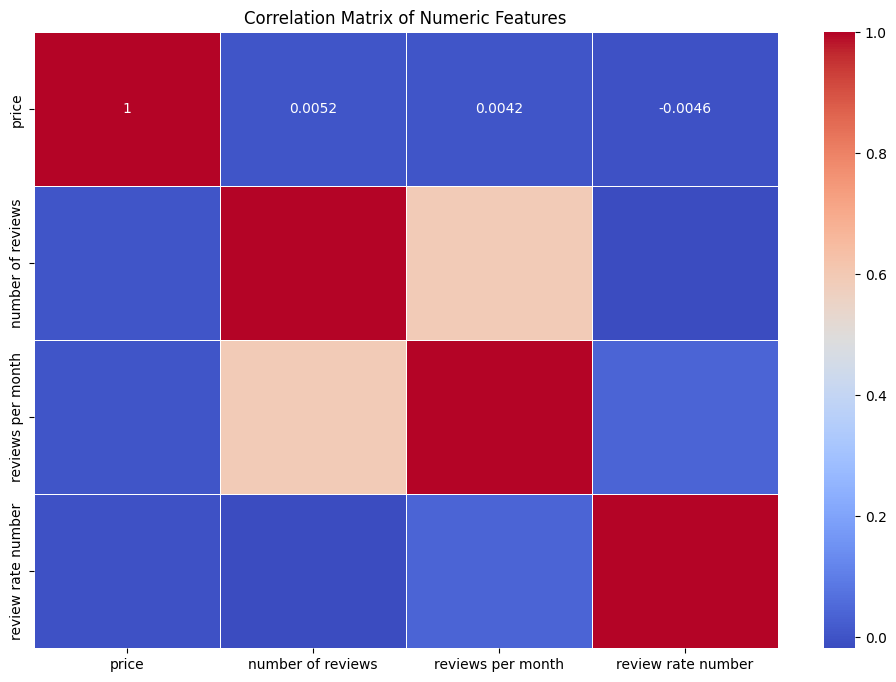

In [126]:
# 5. Heatmap of Correlations between Numeric Features
plt.figure(figsize=(12, 8))
# Selecting only relevant numeric columns
correlation_matrix = airbnb_data[['price', 'number of reviews', 'reviews per month', 'review rate number']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [94]:
airbnb_data[['price','service fee']].head()

,price,service fee
0,966.0,193.0
1,142.0,28.0
2,620.0,124.0
3,368.0,74.0
4,204.0,41.0


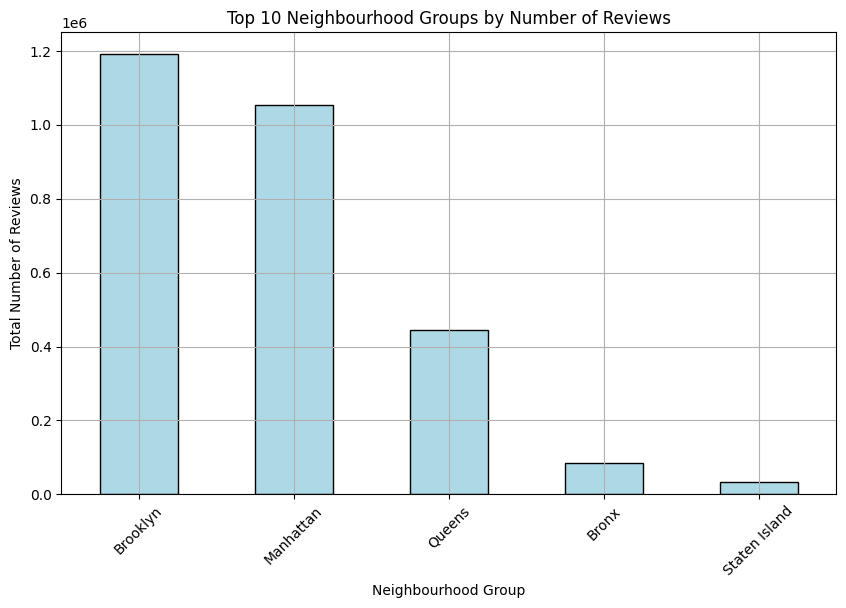

In [29]:
# Group the data by 'neighbourhood group' and sum the 'number of reviews'
neighbourhood_reviews = airbnb_data.groupby('neighbourhood group')['number of reviews'].sum().sort_values(ascending=False)

# Select the top 10 neighbourhood groups with the highest number of reviews
top_10_neighbourhoods = neighbourhood_reviews.head(10)

# Plot a bar chart for the top 10 neighbourhood groups by number of reviews
plt.figure(figsize=(10, 6))
top_10_neighbourhoods.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Top 10 Neighbourhood Groups by Number of Reviews')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [36]:
# Import pandas display options to show all rows
pd.set_option('display.max_rows', None)  # This ensures that all rows are printed

# Output the total number of reviews for all neighbourhood groups
neighbourhood_reviews = airbnb_data.groupby('neighbourhood group')['number of reviews'].sum().sort_values(ascending=False)

# Print the total number of reviews for each neighbourhood group using a loop
print("Total Number of Reviews for Each Neighbourhood Group:")
for neighbourhood, reviews in neighbourhood_reviews.items():
    print(f"{neighbourhood}: {reviews}")




Total Number of Reviews for Each Neighbourhood Group:
Brooklyn: 1191129.0
Manhattan: 1054780.0
Queens: 445876.0
Bronx: 85844.0
Staten Island: 34098.0


In [35]:
print(airbnb_data['neighbourhood'].unique())

['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges' 'Queens Village' 'Rockaway Beach' 'Forest Hills' 'Nolita'
 'Woodlawn' 'University Heights' '

In [37]:
# Clean the 'number of reviews' to ensure no NaN values
airbnb_data['number of reviews'] = pd.to_numeric(airbnb_data['number of reviews'], errors='coerce').fillna(0)

# Group the data by 'neighbourhood group' and sum the 'number of reviews'
neighbourhood_reviews = airbnb_data.groupby('neighbourhood group')['number of reviews'].sum().sort_values(ascending=False)

# Print the total number of reviews for each neighbourhood group using a loop
print("Total Number of Reviews for Each Neighbourhood Group:")
for neighbourhood, reviews in neighbourhood_reviews.items():
    print(f"{neighbourhood}: {reviews}")


Total Number of Reviews for Each Neighbourhood Group:
Brooklyn: 1191129.0
Manhattan: 1054780.0
Queens: 445876.0
Bronx: 85844.0
Staten Island: 34098.0


In [41]:
# Clean the 'number of reviews' to ensure no NaN values
airbnb_data['number of reviews'] = pd.to_numeric(airbnb_data['number of reviews'], errors='coerce').fillna(0)




Top Neighbourhood Groups by Number of Reviews:
Brooklyn: 1191129.0
Manhattan: 1054780.0
Queens: 445876.0
Bronx: 85844.0
Staten Island: 34098.0


Total number of unique neighbourhood groups: 5
Unique Neighbourhood Groups:
['Brooklyn' 'Manhattan' 'Queens' nan 'Staten Island' 'Bronx']
Total Number of Reviews for Each Neighbourhood Group:
Brooklyn: 1191129.0
Manhattan: 1054780.0
Queens: 445876.0
Bronx: 85844.0
Staten Island: 34098.0


In [40]:
print(airbnb_data['neighbourhood group'].unique())


['Brooklyn' 'Manhattan' 'Queens' nan 'Staten Island' 'Bronx']


In [42]:
# Identify the top 3 neighbourhood groups by total number of reviews
top_3_neighbourhood_groups = neighbourhood_reviews.head(2).index

# Filter the dataset to include only the top 3 neighbourhood groups
top_3_neighbourhoods = airbnb_data[airbnb_data['neighbourhood group'].isin(top_3_neighbourhood_groups)]

# Count the number of unique neighbourhoods within these top 3 neighbourhood groups
unique_neighbourhoods_count = top_3_neighbourhoods['neighbourhood'].nunique()

# Print the result
print(f"Total number of unique neighbourhoods in the top 3 neighbourhood groups: {unique_neighbourhoods_count}")


Total number of unique neighbourhoods in the top 3 neighbourhood groups: 80


C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

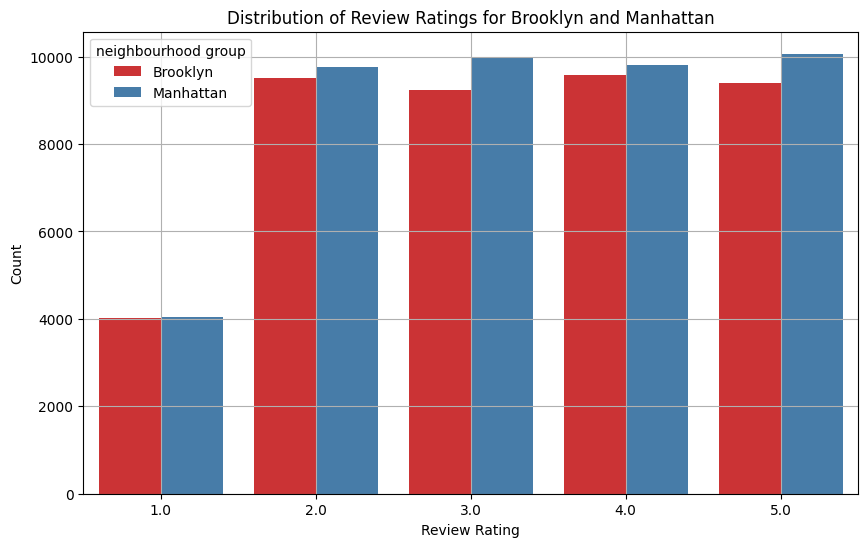

In [95]:
# Filter the dataset for Brooklyn and Manhattan
brooklyn_manhattan_data = airbnb_data[airbnb_data['neighbourhood group'].isin(['Brooklyn', 'Manhattan'])]

# Drop rows with missing values in 'review rate number'
brooklyn_manhattan_data = brooklyn_manhattan_data.dropna(subset=['review rate number'])

# Create a bar plot showing the count of each rating for both Brooklyn and Manhattan
plt.figure(figsize=(10, 6))
sns.countplot(x='review rate number', hue='neighbourhood group', data=brooklyn_manhattan_data, palette='Set1')

# Set the title and labels
plt.title('Distribution of Review Ratings for Brooklyn and Manhattan')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.grid(True)

# Show the plot
plt.show()

In [96]:
# Count the number of rows that have a valid 'review rate number' (non-missing values)
review_rate_count = airbnb_data['review rate number'].notna().sum()

# Print the result
print(f"Number of rows with a valid review rate number: {review_rate_count}")


Number of rows with a valid review rate number: 102273


In [97]:
# Remove rows that do not have a 'review rate number' (i.e., rows with NaN in 'review rate number')
airbnb_data_cleaned = airbnb_data.dropna(subset=['review rate number'])

# Display the shape of the cleaned dataset
print(airbnb_data_cleaned.shape)


(102273, 26)


In [99]:
# Group the cleaned dataset by 'neighbourhood group' and count the number of 'review rate number' entries for each group
review_rate_count_per_group = airbnb_data_cleaned.groupby('neighbourhood group')['review rate number'].count().sort_values(ascending=False)

# Print the count of review rate number entries for each neighbourhood group
print("Count of 'Review Rate Number' for Each Neighbourhood Group:")
for neighbourhood, count in review_rate_count_per_group.items():
    print(f"{neighbourhood}: {count}")


Count of 'Review Rate Number' for Each Neighbourhood Group:
Manhattan: 43649
Brooklyn: 41725
Queens: 13228
Bronx: 2695
Staten Island: 949


C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

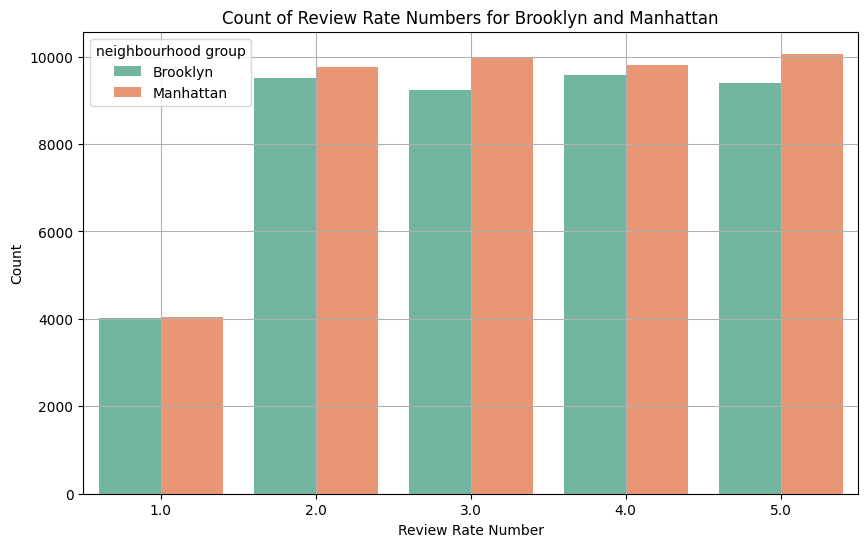

In [104]:
# Filter the dataset for Brooklyn and Manhattan
brooklyn_manhattan_data = airbnb_data_cleaned[airbnb_data_cleaned['neighbourhood group'].isin(['Brooklyn', 'Manhattan'])]

# Create a countplot for each review rate number for Brooklyn and Manhattan
plt.figure(figsize=(10, 6))
sns.countplot(x='review rate number', hue='neighbourhood group', data=brooklyn_manhattan_data, palette='Set2')

# Set the title and labels
plt.title('Count of Review Rate Numbers for Brooklyn and Manhattan')
plt.xlabel('Review Rate Number')
plt.ylabel('Count')
plt.grid(True)

# Show the plot
plt.show()

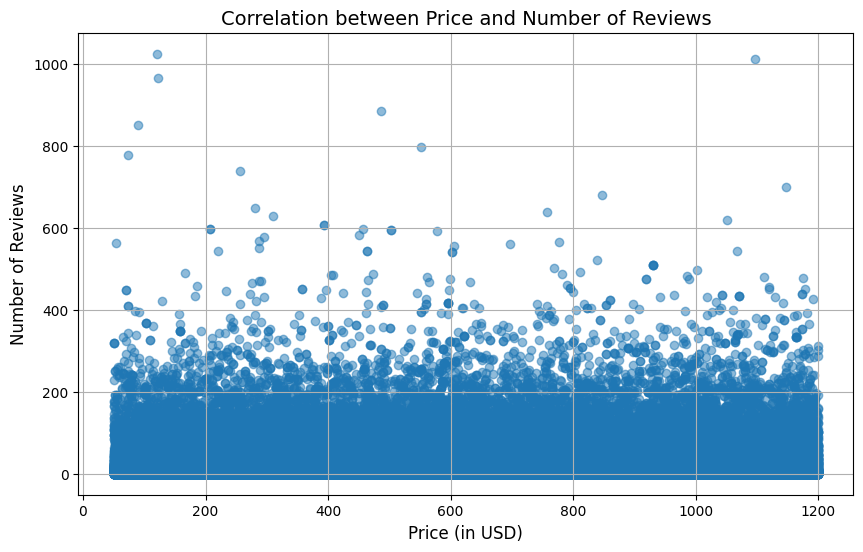

In [105]:
# Remove rows with missing values in 'price' or 'number of reviews'
filtered_data = airbnb_data_cleaned[['price', 'number of reviews']].dropna()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['price'], filtered_data['number of reviews'], alpha=0.5)
plt.title('Correlation between Price and Number of Reviews', fontsize=14)
plt.xlabel('Price (in USD)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(True)
plt.show()


C:\Users\aayus\AppData\Local\Temp\ipykernel_52984\4037648989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_data_cleaned['host_identity_verified'] = airbnb_data_cleaned['host_identity_verified'].apply(lambda x: 1 if x == 'verified' else 0)


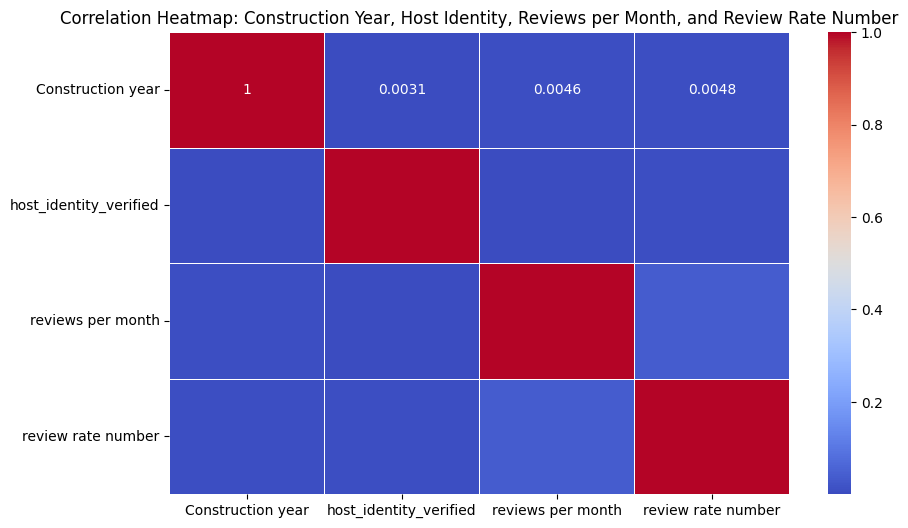

In [106]:

# Ensure 'host_identity_verified' is converted to numeric (1 for verified, 0 for unverified)
airbnb_data_cleaned['host_identity_verified'] = airbnb_data_cleaned['host_identity_verified'].apply(lambda x: 1 if x == 'verified' else 0)

# Select the relevant columns for correlation
columns_for_correlation = ['Construction year', 'host_identity_verified', 'reviews per month', 'review rate number']

# Drop rows with missing values in these relevant columns
airbnb_data_cleanedairbnb_data_cleaned = airbnb_data_cleaned.dropna(subset=columns_for_correlation)

# Calculate the correlation matrix
correlation_matrix = airbnb_data_cleaned[columns_for_correlation].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Construction Year, Host Identity, Reviews per Month, and Review Rate Number')
plt.show()


In [110]:
import pandas as pd

# Filter the data for Manhattan
manhattan_data = airbnb_data_cleaned[airbnb_data_cleaned['neighbourhood group'] == 'Manhattan']

# Count the number of houses constructed in different years
construction_year_counts = manhattan_data['Construction year'].value_counts().sort_index()

# Display the result
print(construction_year_counts)



Construction year
2003.0    2151
2004.0    2107
2005.0    2143
2006.0    2249
2007.0    2193
2008.0    2227
2009.0    2280
2010.0    2171
2011.0    2151
2012.0    2155
2013.0    2169
2014.0    2256
2015.0    2184
2016.0    2189
2017.0    2161
2018.0    2224
2019.0    2169
2020.0    2111
2021.0    2167
2022.0    2105
Name: count, dtype: int64


In [112]:
import pandas as pd

# Filter the data for Manhattan
manhattan_data = airbnb_data_cleaned[airbnb_data_cleaned['neighbourhood group'] == 'Manhattan']

# Group by 'Construction year' and 'review rate number', then count the occurrences of each rating
review_rate_counts_by_year = manhattan_data.groupby(['Construction year', 'review rate number']).size().unstack(fill_value=0)

# Display the result
print(review_rate_counts_by_year)


review rate number  1.0  2.0  3.0  4.0  5.0
Construction year                          
2003.0              234  486  495  423  513
2004.0              164  538  476  412  517
2005.0              203  510  446  478  506
2006.0              205  497  517  497  533
2007.0              201  480  506  532  474
2008.0              211  449  525  505  537
2009.0              222  551  495  543  469
2010.0              190  495  497  484  505
2011.0              165  451  490  488  557
2012.0              164  511  492  535  453
2013.0              193  477  526  489  484
2014.0              217  475  532  508  524
2015.0              200  524  470  500  490
2016.0              189  474  465  550  511
2017.0              204  468  529  493  467
2018.0              200  436  559  466  563
2019.0              187  517  511  480  474
2020.0              209  498  458  444  502
2021.0              270  403  519  522  453
2022.0              192  511  456  426  520


In [117]:
import pandas as pd

# Filter the data for Manhattan
manhattan_data = airbnb_data_cleaned[airbnb_data_cleaned['neighbourhood group'] == 'Brooklyn']

# Group by 'Construction year' and 'review rate number', then count the occurrences of each rating
review_rate_counts_by_year = manhattan_data.groupby(['Construction year', 'review rate number']).size().unstack(fill_value=0)

# Display the result
print(review_rate_counts_by_year)


review rate number  1.0
Construction year      
2010.0                1


In [113]:
# Filter the data for Manhattan
manhattan_data = airbnb_data_cleaned[airbnb_data_cleaned['neighbourhood group'] == 'Brooklyn']

# Group by 'Construction year' and 'review rate number', then count the occurrences of each rating
review_rate_counts_by_year = manhattan_data.groupby(['Construction year', 'review rate number']).size().unstack(fill_value=0)

# Display the result
print(review_rate_counts_by_year)

review rate number  1.0  2.0  3.0  4.0  5.0
Construction year                          
2003.0              193  467  471  494  457
2004.0              184  464  475  442  449
2005.0              226  486  480  461  494
2006.0              175  491  418  469  480
2007.0              177  492  504  444  428
2008.0              186  524  438  494  487
2009.0              197  501  441  480  457
2010.0              223  512  441  494  429
2011.0              179  485  453  492  429
2012.0              227  453  454  492  491
2013.0              182  429  478  467  474
2014.0              184  441  517  481  528
2015.0              225  521  436  487  465
2016.0              193  467  431  463  443
2017.0              227  430  479  503  465
2018.0              187  479  458  466  429
2019.0              196  472  498  534  480
2020.0              200  457  448  493  540
2021.0              208  454  442  442  414
2022.0              240  457  446  465  530


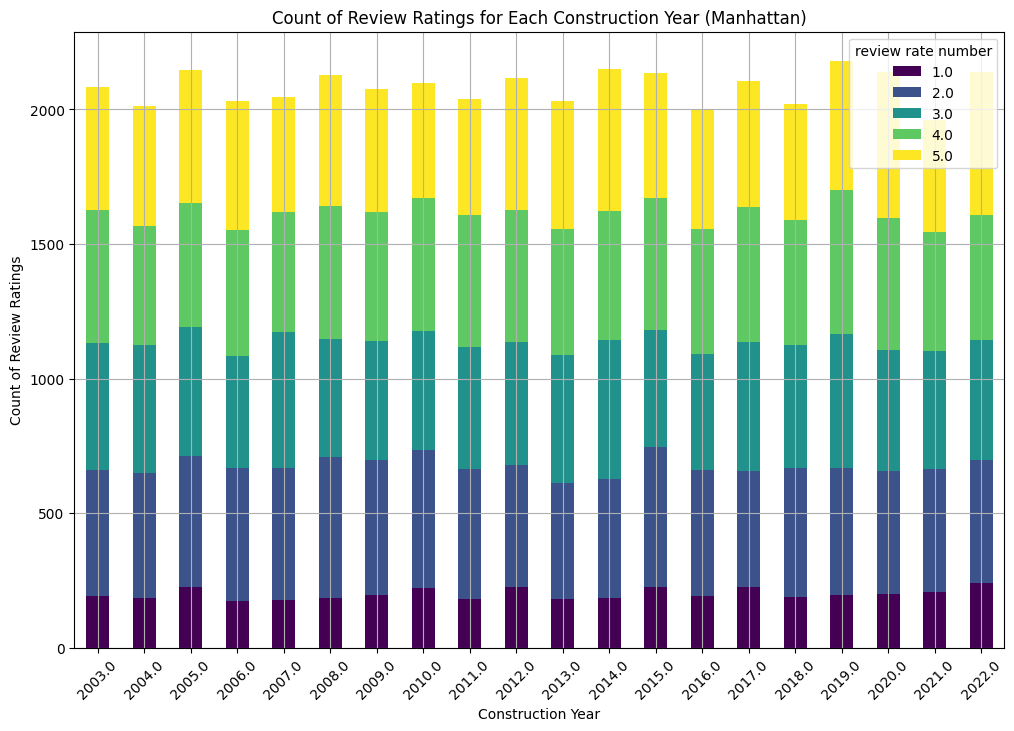

In [114]:
import matplotlib.pyplot as plt

# Plotting the stacked bar plot
review_rate_counts_by_year.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Set the title and labels
plt.title('Count of Review Ratings for Each Construction Year (Manhattan)')
plt.xlabel('Construction Year')
plt.ylabel('Count of Review Ratings')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


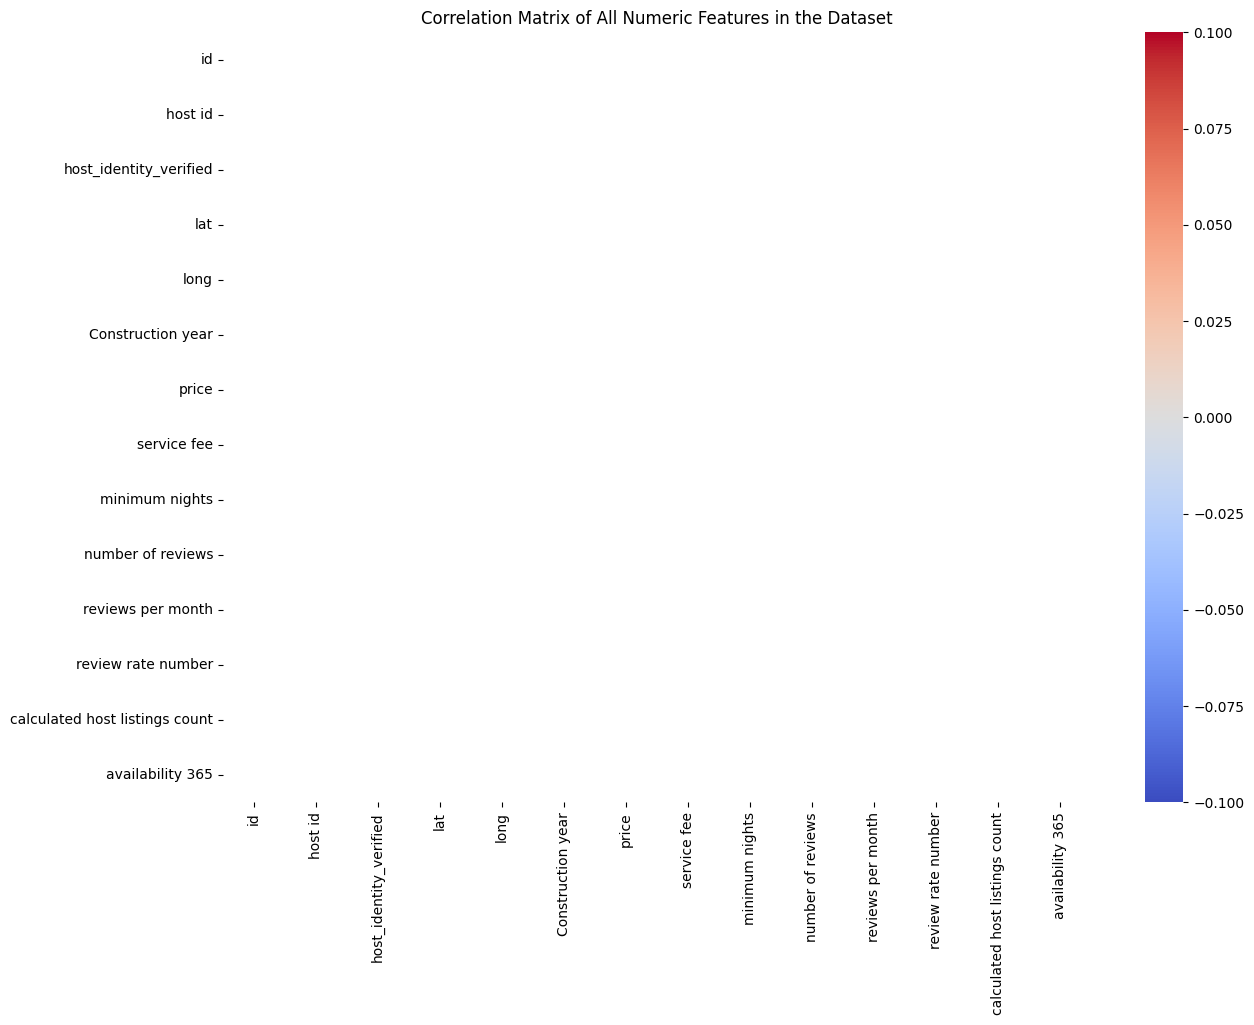

In [118]:
# Convert 'price' and 'service fee' to numeric, handling errors
airbnb_data_cleaned['price'] = pd.to_numeric(airbnb_data_cleaned['price'], errors='coerce')
airbnb_data_cleaned['service fee'] = pd.to_numeric(airbnb_data_cleaned['service fee'], errors='coerce')

# Convert 'host_identity_verified' to numeric (1 for verified, 0 for unverified)
airbnb_data_cleaned['host_identity_verified'] = airbnb_data_cleaned['host_identity_verified'].apply(lambda x: 1 if x == 'verified' else 0)

# Select only numeric columns for correlation
numeric_columns = airbnb_data_cleaned.select_dtypes(include=['float64', 'int64'])

# Drop rows with missing values across selected numeric columns
numeric_columns_cleaned = numeric_columns.dropna()

# Calculate the correlation matrix for all numeric features
correlation_matrix = numeric_columns_cleaned.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Numeric Features in the Dataset')
plt.show()



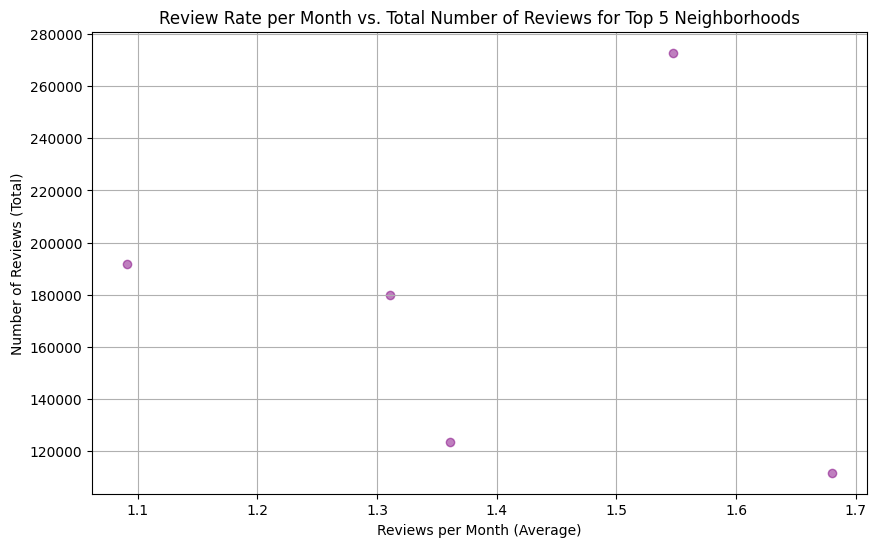

In [128]:
import matplotlib.pyplot as plt

# Group the data by neighborhood and sum the number of reviews
neighbourhood_reviews_sum = airbnb_data.groupby('neighbourhood')['number of reviews'].sum().nlargest(5)

# Filter the dataset for only the top 5 neighborhoods
top_5_neighbourhoods = airbnb_data[airbnb_data['neighbourhood'].isin(neighbourhood_reviews_sum.index)]

# Group again by neighborhood to calculate the sum of reviews and average review rate per month
neighbourhood_grouped = top_5_neighbourhoods.groupby('neighbourhood').agg({
    'number of reviews': 'sum',
    'reviews per month': 'mean'  # Use mean of review rate per month for each neighborhood
}).reset_index()

# Plot the relationship between reviews per month and total number of reviews
plt.figure(figsize=(10, 6))
plt.scatter(neighbourhood_grouped['reviews per month'], neighbourhood_grouped['number of reviews'], alpha=0.5, color='purple')

# Add labels and title
plt.title('Review Rate per Month vs. Total Number of Reviews for Top 5 Neighborhoods')
plt.xlabel('Reviews per Month (Average)')
plt.ylabel('Number of Reviews (Total)')
plt.grid(True)

# Display the plot
plt.show()


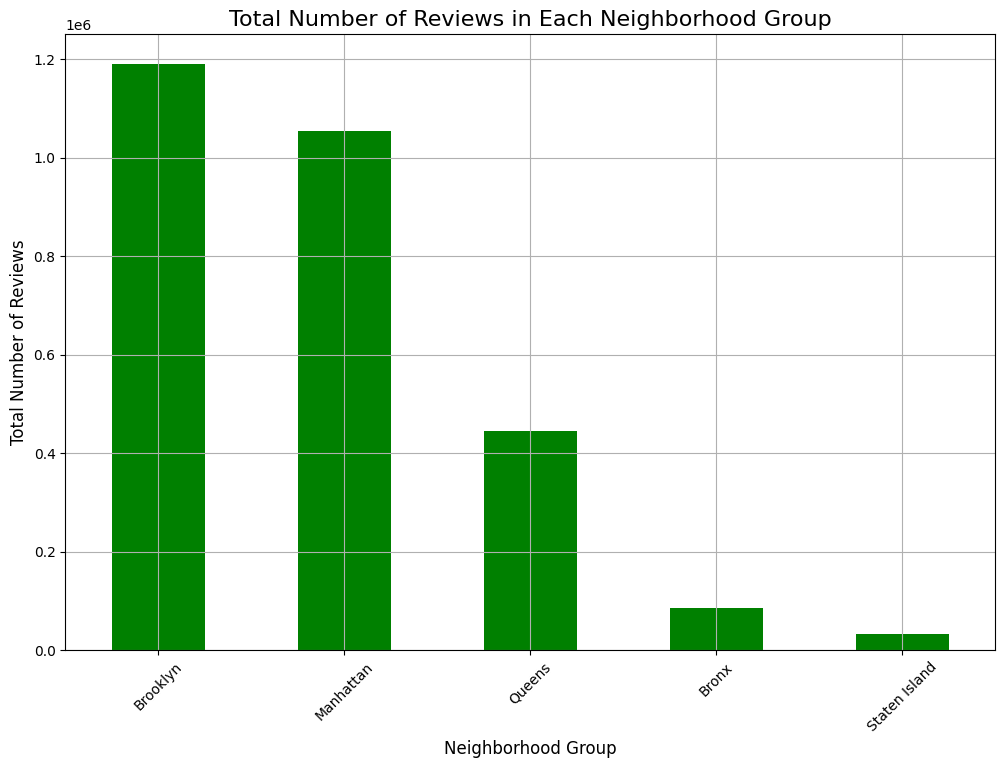

In [131]:
import matplotlib.pyplot as plt

# Group by 'neighbourhood group' and sum the number of reviews
neighbourhood_group_reviews_sum = airbnb_data.groupby('neighbourhood group')['number of reviews'].sum().sort_values(ascending=False)

# Plot the total number of reviews for each neighborhood group
plt.figure(figsize=(12, 8))
neighbourhood_group_reviews_sum.plot(kind='bar', color='green')

# Add labels and title
plt.title('Total Number of Reviews in Each Neighborhood Group', fontsize=16)
plt.xlabel('Neighborhood Group', fontsize=12)
plt.ylabel('Total Number of Reviews', fontsize=12)

# Display the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [132]:
from scipy.stats import pearsonr


# Data cleaning: Removing rows with missing values in 'reviews per month' and 'availability 365'
cleaned_data = airbnb_data[['availability 365', 'reviews per month']].dropna()

# Statistical Analysis: Correlation between 'availability 365' and 'reviews per month'
corr, p_value = pearsonr(cleaned_data['availability 365'], cleaned_data['reviews per month'])


print(f"Correlation between availability and reviews per month: {corr}")
print(f"P-value: {p_value}")




Correlation between availability and reviews per month: 0.07719268101814863
P-value: 1.7622290157369627e-114


C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='availability 365', ylabel='reviews per month'>

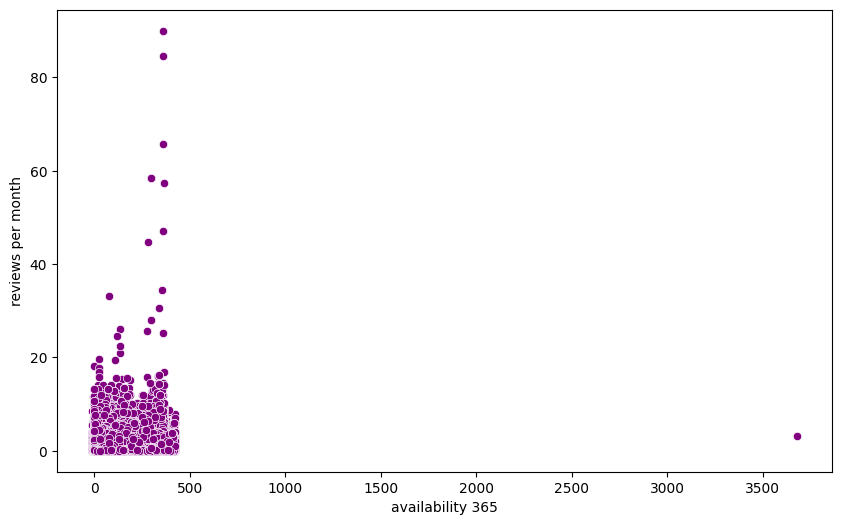

In [133]:
# Visualization: Scatter plot of availability vs. reviews per month
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability 365', y='reviews per month', data=cleaned_data, color='purple')



C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


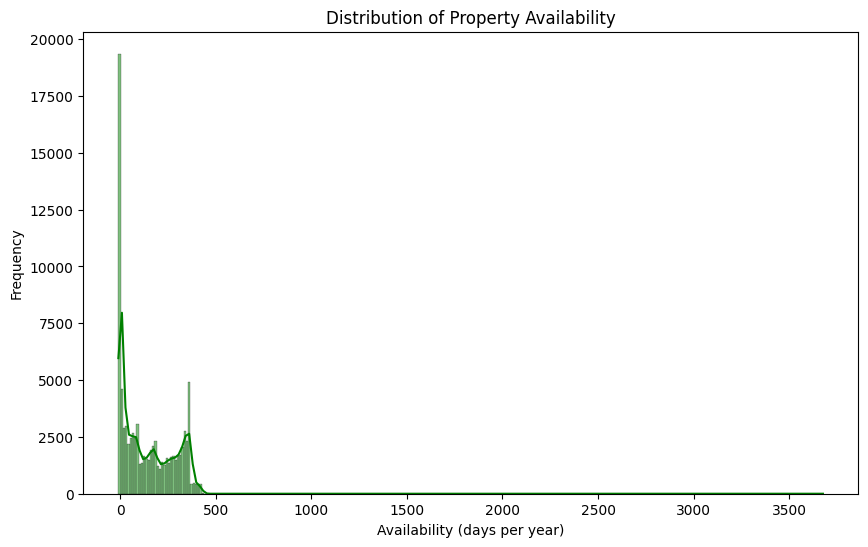

In [135]:
# Additional: Distribution of availability
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['availability 365'], kde=True, color='green')

# Adding title and labels
plt.title('Distribution of Property Availability')
plt.xlabel('Availability (days per year)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Correlation between price and reviews per month: 0.004186193730286262
P-value: 0.21825401137201017


C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


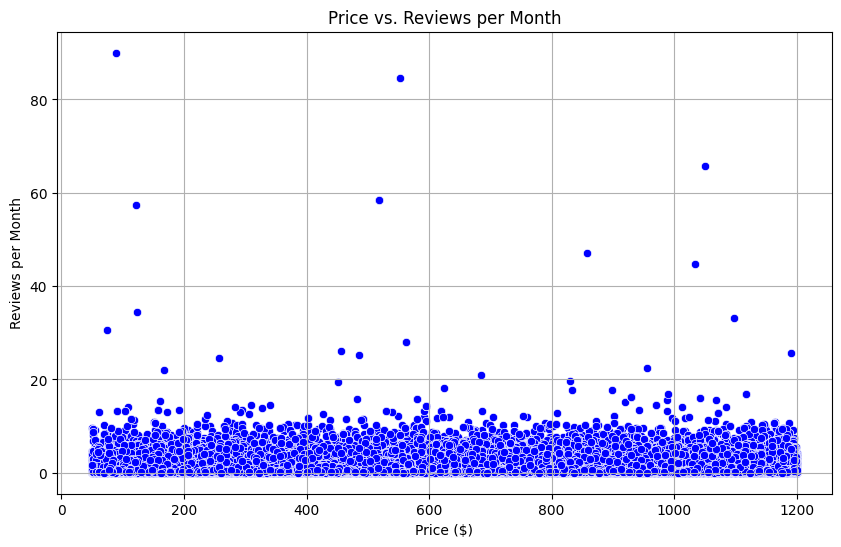

In [136]:

# Clean the dataset, focusing on 'price' and 'reviews per month'
cleaned_price_data = airbnb_data[['price', 'reviews per month']].dropna()

# Statistical Analysis: Correlation between 'price' and 'reviews per month'
price_corr, price_p_value = pearsonr(cleaned_price_data['price'], cleaned_price_data['reviews per month'])

# Display the correlation result
print(f"Correlation between price and reviews per month: {price_corr}")
print(f"P-value: {price_p_value}")

# Visualization: Scatter plot of price vs. reviews per month
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='reviews per month', data=cleaned_price_data, color='blue')
plt.title('Price vs. Reviews per Month')
plt.xlabel('Price ($)')
plt.ylabel('Reviews per Month')
plt.grid(True)
plt.show()




C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


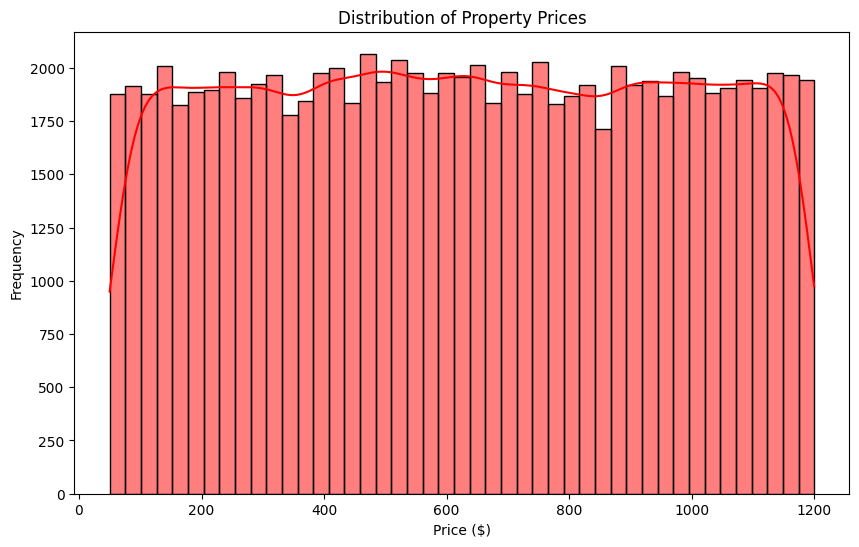

In [137]:
# Additional: Distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_price_data['price'], kde=True, color='red')
plt.title('Distribution of Property Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

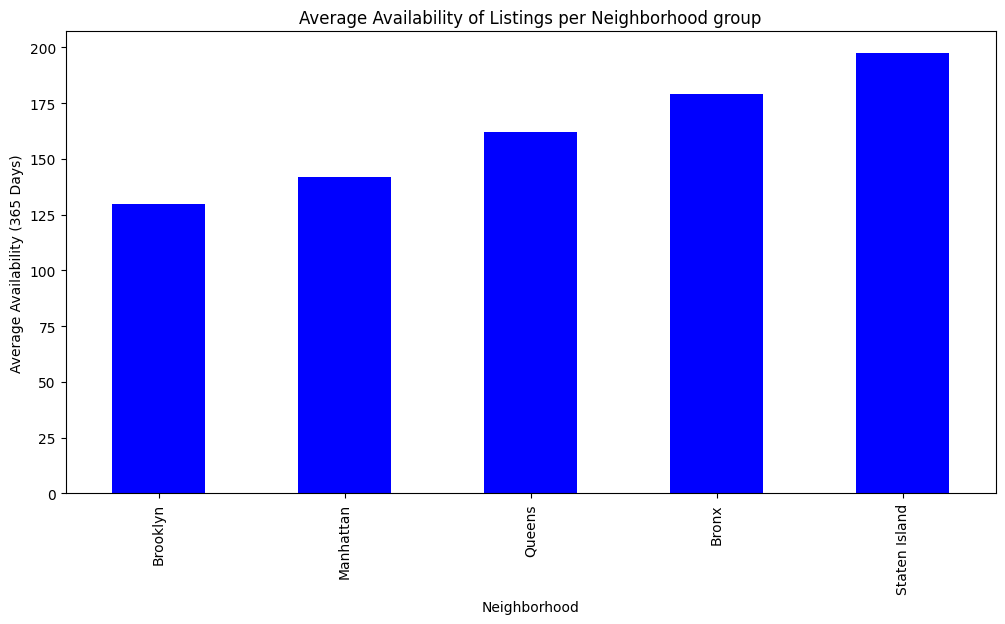

In [139]:
avg_availability_neighborhood = airbnb_data.groupby('neighbourhood group')['availability 365'].mean().sort_values()
avg_availability_neighborhood.plot(kind='bar', figsize=(12, 6), color='blue')
plt.title('Average Availability of Listings per Neighborhood group')
plt.xlabel('Neighborhood')
plt.ylabel('Average Availability (365 Days)')
plt.show()


In [141]:
# Convert 'review rate number' and 'number of reviews' columns to numeric (in case of data issues)
airbnb_data['review rate number'] = pd.to_numeric(airbnb_data['review rate number'], errors='coerce')
airbnb_data['number of reviews'] = pd.to_numeric(airbnb_data['number of reviews'], errors='coerce')

# Filter data for review rate numbers 4 and 5
filtered_data = airbnb_data[airbnb_data['review rate number'].isin([4, 5])]

# Group by 'neighbourhood group' and calculate the total number of reviews
grouped_reviews = filtered_data.groupby('neighbourhood group')['number of reviews'].sum().reset_index()
grouped_reviews.columns = ['Neighbourhood Group', 'Total Number of Reviews for 4 and 5 Review Rate']
print(grouped_reviews)


  Neighbourhood Group  Total Number of Reviews for 4 and 5 Review Rate
0               Bronx                                          36654.0
1            Brooklyn                                         533983.0
2           Manhattan                                         465259.0
3              Queens                                         203692.0
4       Staten Island                                          15411.0


C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


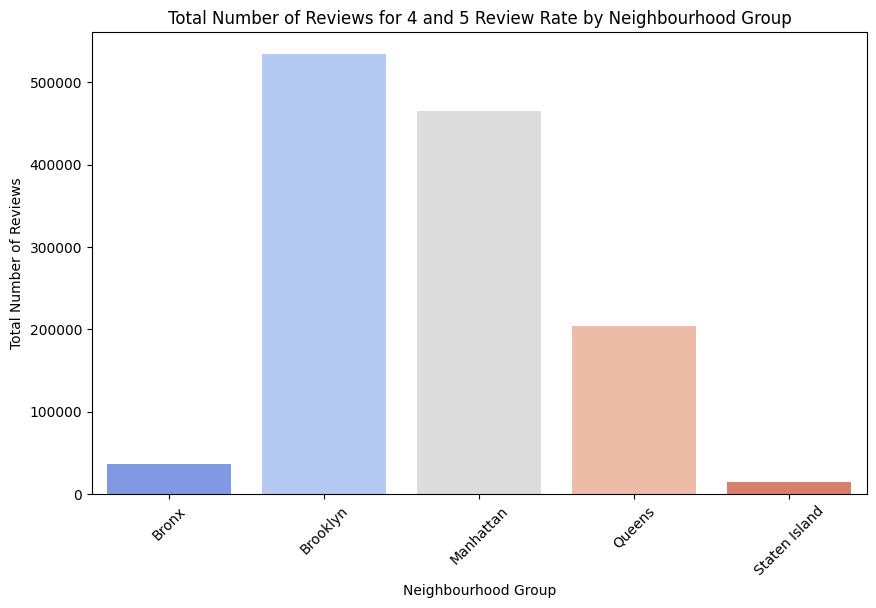

In [142]:
# Plotting the total number of reviews for 4 and 5 review rate properties
plt.figure(figsize=(10, 6))
sns.barplot(x='Neighbourhood Group', y='Total Number of Reviews for 4 and 5 Review Rate', data=grouped_reviews, palette='coolwarm')
plt.title('Total Number of Reviews for 4 and 5 Review Rate by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.show()

In [172]:
# Remove rows with missing values in 'price' or 'number of reviews'
airbnb_data = airbnb_data[['cancellation_policy', 'review rate number']].dropna()
# Convert 'review rate number' and 'number of reviews' columns to numeric (in case of data issues)
airbnb_data['review rate number'] = pd.to_numeric(airbnb_data['review rate number'], errors='coerce')
airbnb_data['number of reviews'] = pd.to_numeric(airbnb_data['number of reviews'], errors='coerce')

# Filter data for review rate numbers 4 and 5
filtered_data = airbnb_data[airbnb_data['review rate number'].isin([ 4, 5])]

# Group by 'neighbourhood group' and 'cancellation policy' to calculate the total number of reviews
grouped_reviews = filtered_data.groupby(['neighbourhood group', 'cancellation_policy'])['number of reviews'].sum().reset_index()

# Rename the columns for clarity
grouped_reviews.columns = ['neighbourhood group', 'cancellation_policy', 'Total Number of Reviews']

# Display the result
(grouped_reviews)



,neighbourhood group,cancellation_policy,Total Number of Reviews
0,Bronx,flexible,11703.0
1,Bronx,moderate,12925.0
2,Bronx,strict,12026.0
3,Brooklyn,flexible,178991.0
4,Brooklyn,moderate,178134.0
5,Brooklyn,nan,1420.0
6,Brooklyn,strict,175438.0
7,Manhattan,flexible,155701.0
8,Manhattan,moderate,160454.0
9,Manhattan,nan,384.0


C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

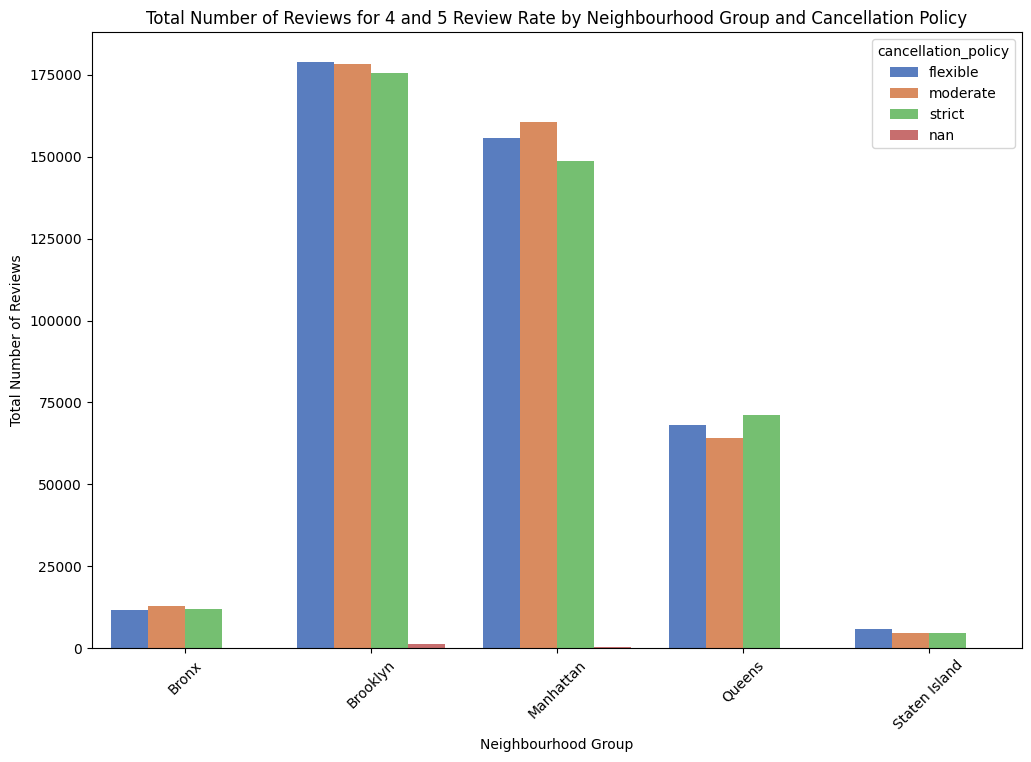

In [173]:
# Plotting the total number of reviews for 4 and 5 review rate properties by cancellation policy
plt.figure(figsize=(12, 8))
sns.barplot(x='neighbourhood group', y='Total Number of Reviews', hue='cancellation_policy', data=grouped_reviews, palette='muted')

# Add titles and labels
plt.title('Total Number of Reviews for 4 and 5 Review Rate by Neighbourhood Group and Cancellation Policy')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total Number of Reviews')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [159]:
# Fix 'review rate number' by converting to numeric (invalid parsing will be set as NaN)
airbnb_data['review rate number'] = pd.to_numeric(airbnb_data['review rate number'], errors='coerce')

# Fix 'number of reviews' by converting to numeric (invalid parsing will be set as NaN)
airbnb_data['number of reviews'] = pd.to_numeric(airbnb_data['number of reviews'], errors='coerce')

# If 'cancellation policy' is a string column, ensure it's treated as such
airbnb_data['cancellation_policy'] = airbnb_data['cancellation_policy'].astype(str)

# Check for any NaN values introduced during the conversion
print(airbnb_data.isna().sum())

# Filter data for review rate numbers from 1 to 5
filtered_data = airbnb_data[airbnb_data['review rate number'].isin([1, 2, 3, 4, 5])]

# Group by 'neighbourhood group', 'cancellation policy', and 'review rate number', then sum the 'number of reviews'
grouped_reviews = filtered_data.groupby(['neighbourhood group', 'cancellation_policy', 'review rate number'])['number of reviews'].sum().reset_index()

# Rename the columns for clarity
grouped_reviews.columns = ['Neighbourhood Group', 'Cancellation Policy', 'Review Rate Number', 'Total Number of Reviews']

# Display the result
print(grouped_reviews)

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                    0
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

AttributeError: 'numpy.float64' object has no attribute 'startswith'

<Figure size 1400x800 with 0 Axes>

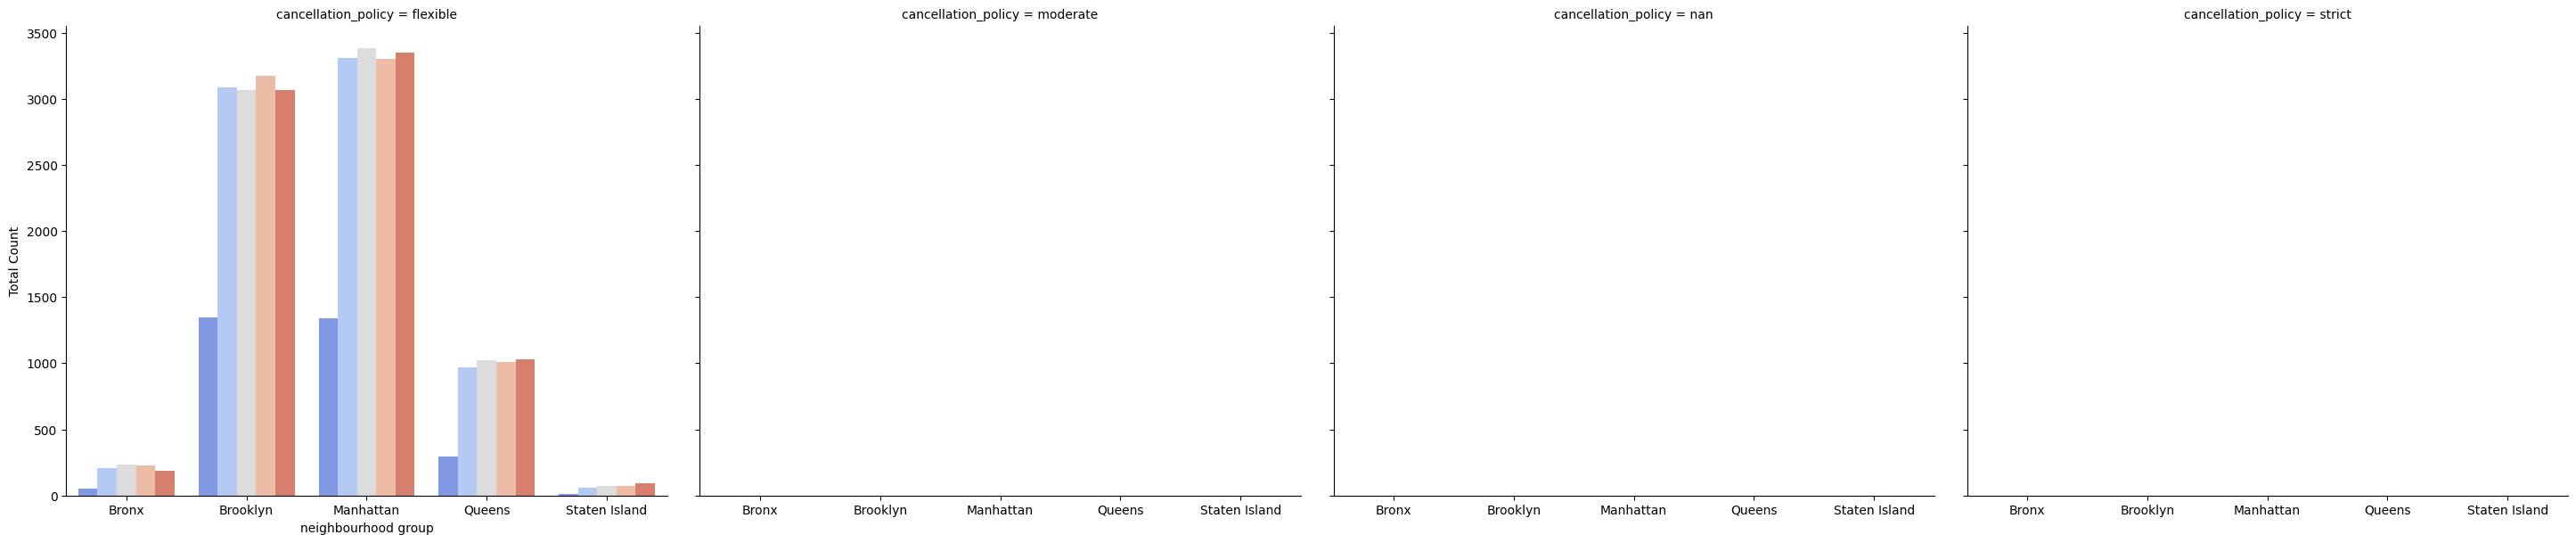

In [168]:
# Clean up column names (remove leading/trailing spaces, convert to lowercase)
airbnb_data.columns = airbnb_data.columns.str.strip().str.lower()

# Convert 'review rate number' to numeric (if it contains non-numeric values)
airbnb_data['review rate number'] = pd.to_numeric(airbnb_data['review rate number'], errors='coerce')

# Filter data for review rate numbers from 1 to 5
filtered_data = airbnb_data[airbnb_data['review rate number'].isin([1, 2, 3, 4, 5])]

# Group by 'neighbourhood group', 'cancellation policy', and 'review rate number', and count the occurrences
grouped_counts = filtered_data.groupby(['neighbourhood group', 'cancellation_policy', 'review rate number']).size().reset_index(name='Total Count')

# Plotting the data
plt.figure(figsize=(14, 8))

# Using seaborn to create a count plot
sns.catplot(x='neighbourhood group', y='Total Count', hue='review rate number', col='cancellation_policy', data=grouped_counts, kind='bar', palette='coolwarm', height=6, aspect=1.2)

# Add titles and labels
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Count of Reviews by Review Rate (1-5) for Each Cancellation Policy and Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total Count of Reviews')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [169]:
# Convert 'review rate number' and 'number of reviews' columns to numeric
airbnb_data['review rate number'] = pd.to_numeric(airbnb_data['review rate number'], errors='coerce')
airbnb_data['number of reviews'] = pd.to_numeric(airbnb_data['number of reviews'], errors='coerce')

# Filter the data to include only review rate numbers from 1 to 5
filtered_data = airbnb_data[airbnb_data['review rate number'].isin([1, 2, 3, 4, 5])]

# Create a new column categorizing the review rate as either '1, 2, 3' or '4, 5'
filtered_data['review_category'] = filtered_data['review rate number'].apply(lambda x: '4 and 5' if x in [4, 5] else '1, 2, and 3')

# Group by the new review category and sum the number of reviews
grouped_reviews = filtered_data.groupby('review_category')['number of reviews'].sum().reset_index()

# Calculate the total number of reviews
total_reviews = grouped_reviews['number of reviews'].sum()

# Calculate the percentage for each category
grouped_reviews['Percentage'] = (grouped_reviews['number of reviews'] / total_reviews) * 100

# Display the result
print(grouped_reviews)

  review_category  number of reviews  Percentage
0     1, 2, and 3          1543285.0   55.131675
1         4 and 5          1255986.0   44.868325


C:\Users\aayus\AppData\Local\Temp\ipykernel_52984\197069457.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['review_category'] = filtered_data['review rate number'].apply(lambda x: '4 and 5' if x in [4, 5] else '1, 2, and 3')


C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


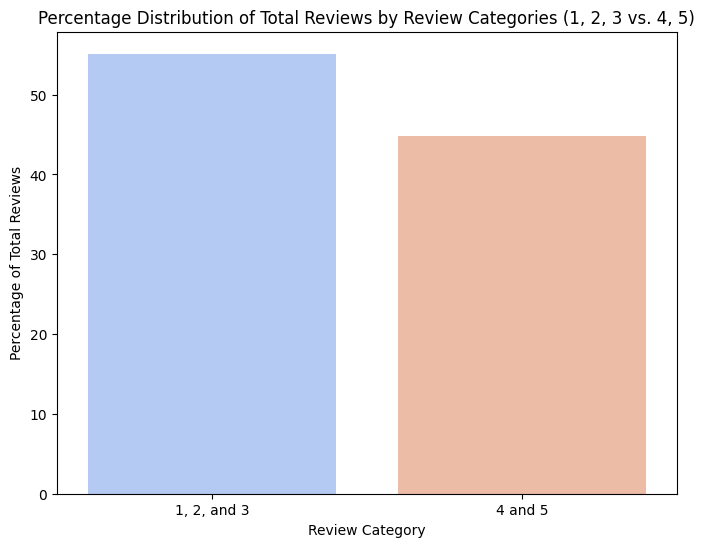

In [170]:
# Plotting the percentage distribution
plt.figure(figsize=(8, 6))
sns.barplot(x='review_category', y='Percentage', data=grouped_reviews, palette='coolwarm')
plt.title('Percentage Distribution of Total Reviews by Review Categories (1, 2, 3 vs. 4, 5)')
plt.xlabel('Review Category')
plt.ylabel('Percentage of Total Reviews')
plt.show()

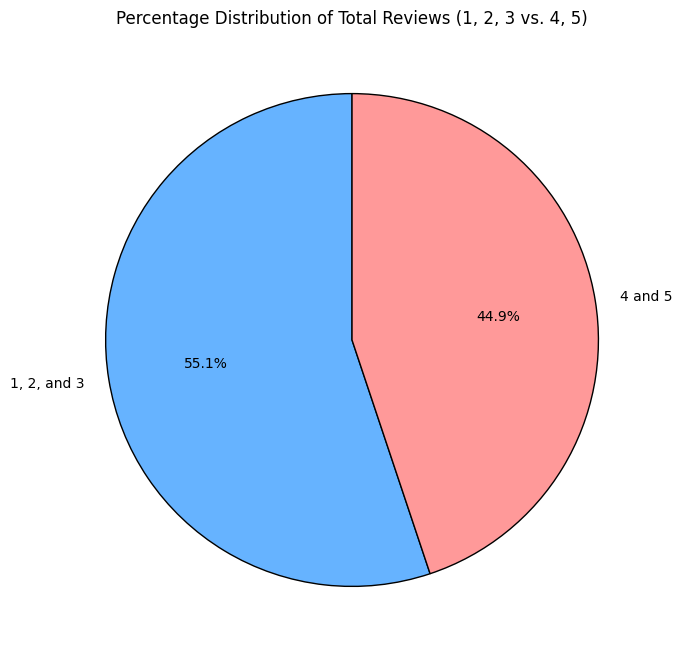

In [171]:
# Plotting the percentage distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped_reviews['Percentage'], labels=grouped_reviews['review_category'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Percentage Distribution of Total Reviews (1, 2, 3 vs. 4, 5)')
plt.show()

In [200]:

# Convert 'review rate number' and 'number of reviews' columns to numeric (in case of data issues)
airbnb_data['review rate number'] = pd.to_numeric(airbnb_data['review rate number'], errors='coerce')
airbnb_data['number of reviews'] = pd.to_numeric(airbnb_data['number of reviews'], errors='coerce')

# Filter data for review rate numbers 4 and 5
filtered_data = airbnb_data[airbnb_data['review rate number'].isin([ 4, 5])]

# Group by 'neighbourhood group' and 'cancellation policy' to calculate the total number of reviews
grouped_reviews = filtered_data.groupby(['neighbourhood group', 'cancellation_policy'])['number of reviews'].sum().reset_index()

# Rename the columns for clarity
grouped_reviews.columns = ['neighbourhood group', 'cancellation_policy', 'Total Number of Reviews']

# Display the result
(grouped_reviews)

KeyError: 'review rate number'

C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

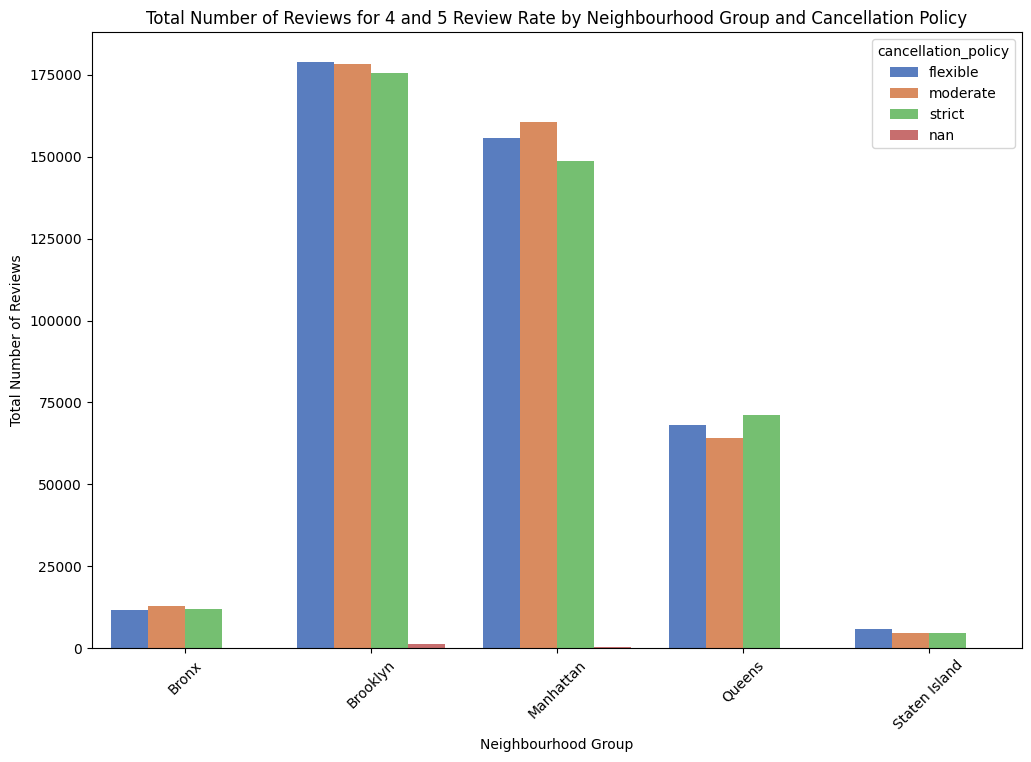

In [175]:
# Plotting the total number of reviews for 4 and 5 review rate properties by cancellation policy
plt.figure(figsize=(12, 8))
sns.barplot(x='neighbourhood group', y='Total Number of Reviews', hue='cancellation_policy', data=grouped_reviews, palette='muted')

# Add titles and labels
plt.title('Total Number of Reviews for 4 and 5 Review Rate by Neighbourhood Group and Cancellation Policy')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total Number of Reviews')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

  Neighbourhood Group  Total Number of Reviews for 1, 2, and 3
0               Bronx                                  48298.0
1            Brooklyn                                 651315.0
2           Manhattan                                 584198.0
3              Queens                                 239489.0
4       Staten Island                                  18050.0


C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


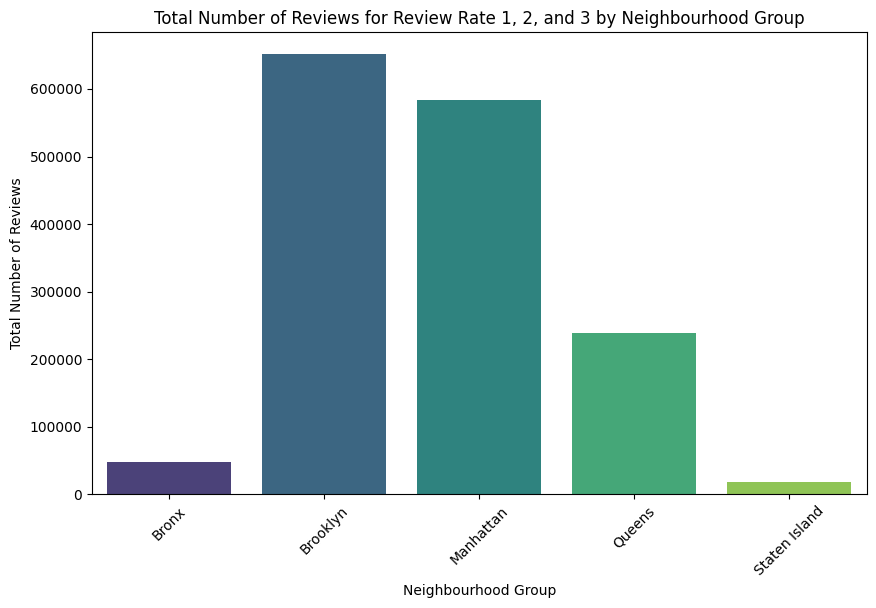

In [177]:


# Convert 'review rate number' and 'number of reviews' columns to numeric
airbnb_data['review rate number'] = pd.to_numeric(airbnb_data['review rate number'], errors='coerce')
airbnb_data['number of reviews'] = pd.to_numeric(airbnb_data['number of reviews'], errors='coerce')

# Filter the data to include only review rate numbers 1, 2, and 3
filtered_data = airbnb_data[airbnb_data['review rate number'].isin([1, 2, 3])]

# Group by 'neighbourhood group' and sum the 'number of reviews'
grouped_reviews = filtered_data.groupby('neighbourhood group')['number of reviews'].sum().reset_index()

# Rename the columns for clarity
grouped_reviews.columns = ['Neighbourhood Group', 'Total Number of Reviews for 1, 2, and 3']
print(grouped_reviews)
plt.figure(figsize=(10, 6))
sns.barplot(x='Neighbourhood Group', y='Total Number of Reviews for 1, 2, and 3', data=grouped_reviews, palette='viridis')
plt.title('Total Number of Reviews for Review Rate 1, 2, and 3 by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.show()


   Neighbourhood Group Cancellation Policy  \
0                Bronx            flexible   
1                Bronx            moderate   
2                Bronx              strict   
3             Brooklyn            flexible   
4             Brooklyn            moderate   
5             Brooklyn              strict   
6            Manhattan            flexible   
7            Manhattan            moderate   
8            Manhattan              strict   
9               Queens            flexible   
10              Queens            moderate   
11              Queens              strict   
12       Staten Island            flexible   
13       Staten Island            moderate   
14       Staten Island              strict   

    Total Number of Reviews for 1, 2, and 3  
0                                   15532.0  
1                                   16126.0  
2                                   16640.0  
3                                  214131.0  
4                                

C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

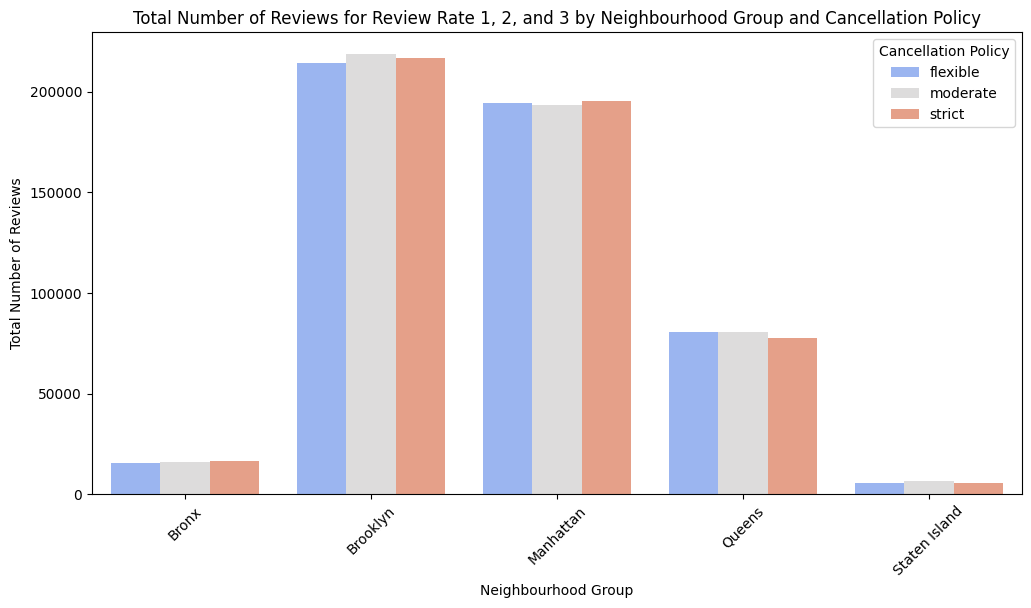

In [181]:


# Convert 'review rate number' and 'number of reviews' columns to numeric
airbnb_data['review rate number'] = pd.to_numeric(airbnb_data['review rate number'], errors='coerce')
airbnb_data['number of reviews'] = pd.to_numeric(airbnb_data['number of reviews'], errors='coerce')

# Drop rows where 'cancellation policy' is null
airbnb_data = airbnb_data.dropna(subset=['cancellation_policy'])

# Filter the data to include only review rate numbers 1, 2, and 3
filtered_data = airbnb_data[airbnb_data['review rate number'].isin([1, 2, 3])]

# Further filter to keep only the rows with valid cancellation policies (e.g., 'flexible', 'moderate', 'strict')
valid_policies = ['flexible', 'moderate', 'strict']
filtered_data = filtered_data[filtered_data['cancellation_policy'].isin(valid_policies)]

# Group by 'neighbourhood group' and 'cancellation policy', and sum the 'number of reviews'
grouped_reviews = filtered_data.groupby(['neighbourhood group', 'cancellation_policy'])['number of reviews'].sum().reset_index()

# Rename the columns for clarity
grouped_reviews.columns = ['Neighbourhood Group', 'Cancellation Policy', 'Total Number of Reviews for 1, 2, and 3']

# Display the result
print(grouped_reviews)

# Optional: Visualize the result as a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Neighbourhood Group', y='Total Number of Reviews for 1, 2, and 3', hue='Cancellation Policy', data=grouped_reviews, palette='coolwarm')

# Add title and labels
plt.title('Total Number of Reviews for Review Rate 1, 2, and 3 by Neighbourhood Group and Cancellation Policy')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total Number of Reviews')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [184]:

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression


# Convert 'review rate number', 'number of reviews', 'price', and 'construction year' to numeric
airbnb_data['review rate number'] = pd.to_numeric(airbnb_data['review rate number'], errors='coerce')
airbnb_data['number of reviews'] = pd.to_numeric(airbnb_data['number of reviews'], errors='coerce')
airbnb_data['price'] = airbnb_data['price'].replace('[\$,]', '', regex=True).astype(float)  # remove $ signs and convert to float
airbnb_data['construction year'] = pd.to_numeric(airbnb_data['construction year'], errors='coerce')

# Drop rows where 'cancellation policy' or 'host_identity_verified' is null
airbnb_data = airbnb_data.dropna(subset=['cancellation_policy', 'host_identity_verified'])

# Filter the data to include only review rate numbers 1, 2, and 3
filtered_data = airbnb_data[airbnb_data['review rate number'].isin([1, 2, 3])]

# Further filter to keep only the rows with valid cancellation policies ('flexible', 'moderate', 'strict')
valid_policies = ['flexible', 'moderate', 'strict']
filtered_data = filtered_data[filtered_data['cancellation_policy'].isin(valid_policies)]

# 1. Correlation Analysis for Price, Host Identity, and Construction Year
# Encoding 'host_identity_verified' as a binary variable (1 if verified, 0 if unverified)
filtered_data['host_identity_verified'] = filtered_data['host_identity_verified'].apply(lambda x: 1 if x == 'verified' else 0)

# Drop rows where any of the key columns ('price', 'construction year') are missing
filtered_data = filtered_data.dropna(subset=['price', 'construction year'])

# Calculate Pearson correlation coefficients
price_corr, _ = pearsonr(filtered_data['price'], filtered_data['review rate number'])
year_corr, _ = pearsonr(filtered_data['construction year'], filtered_data['review rate number'])
host_corr, _ = pearsonr(filtered_data['host_identity_verified'], filtered_data['review rate number'])

print(f"Correlation between Price and Review Rating (1-3): {price_corr}")
print(f"Correlation between Construction Year and Review Rating (1-3): {year_corr}")
print(f"Correlation between Host Identity Verification and Review Rating (1-3): {host_corr}")




# 2. Linear Regression to Check Effects of Price, Host Identity, and Construction Year on Rating
X = filtered_data[['price', 'construction year', 'host_identity_verified']]
y = filtered_data['review rate number']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Display the coefficients for each feature
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)



Correlation between Price and Review Rating (1-3): -0.0005622722023718238
Correlation between Construction Year and Review Rating (1-3): -0.004546796240463134
Correlation between Host Identity Verification and Review Rating (1-3): 0.0030255346199320743
                        Coefficient
price                     -0.000001
construction year         -0.000569
host_identity_verified     0.004379


C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aayus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

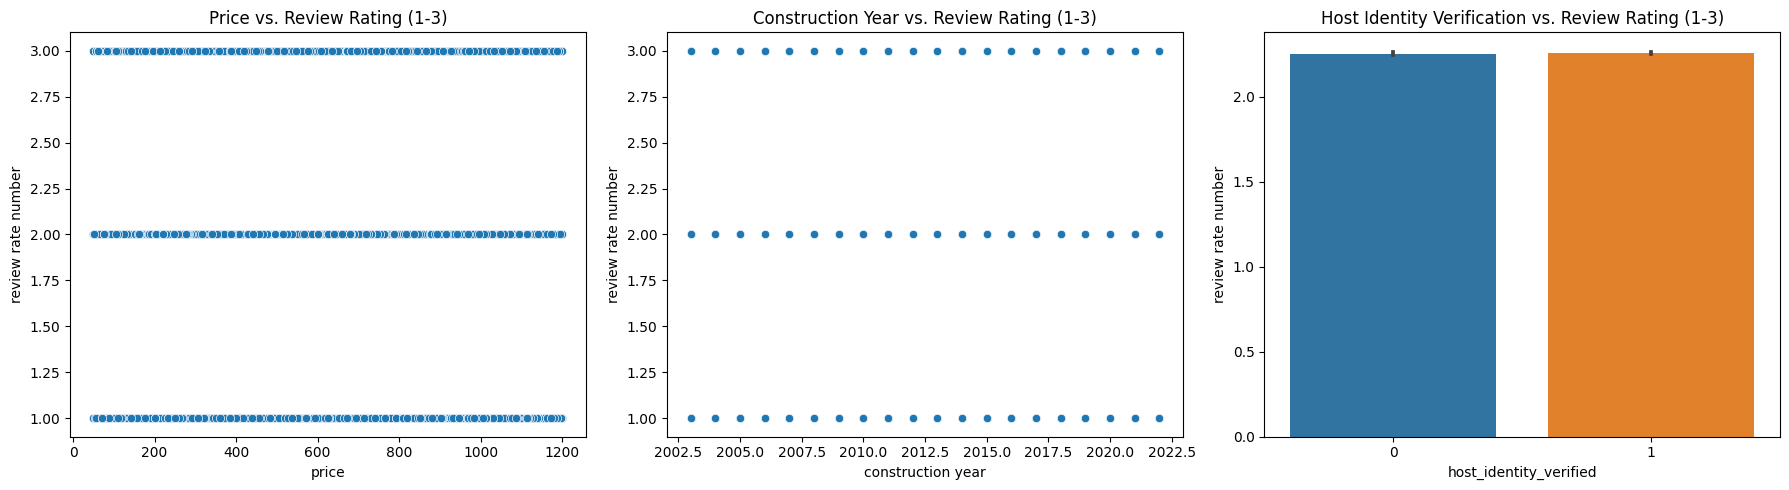

In [185]:
# 3. Visualize the relationships using scatter plots
plt.figure(figsize=(18, 5))

# Plot price vs. rating
plt.subplot(1, 3, 1)
sns.scatterplot(x='price', y='review rate number', data=filtered_data)
plt.title('Price vs. Review Rating (1-3)')

# Plot construction year vs. rating
plt.subplot(1, 3, 2)
sns.scatterplot(x='construction year', y='review rate number', data=filtered_data)
plt.title('Construction Year vs. Review Rating (1-3)')

# Plot host identity verification vs. rating
plt.subplot(1, 3, 3)
sns.barplot(x='host_identity_verified', y='review rate number', data=filtered_data)
plt.title('Host Identity Verification vs. Review Rating (1-3)')

plt.tight_layout()
plt.show()

In [194]:

# Debug: Check the column names to find the exact name for 'neighbourhood group'
print("Column names:", airbnb_data.columns)

# Clean column names by stripping spaces and converting to lowercase for consistency
airbnb_data.columns = airbnb_data.columns.str.strip().str.lower()

# Debug: Print cleaned column names
print("Cleaned column names:", airbnb_data.columns)

# Convert 'review rate number', 'number of reviews', 'price', and 'construction year' to numeric
airbnb_data['review rate number'] = pd.to_numeric(airbnb_data['review rate number'], errors='coerce')
airbnb_data['number of reviews'] = pd.to_numeric(airbnb_data['number of reviews'], errors='coerce')
airbnb_data['price'] = airbnb_data['price'].replace('[\$,]', '', regex=True).astype(float)  # Remove $ signs and convert to float
airbnb_data['construction year'] = pd.to_numeric(airbnb_data['construction year'], errors='coerce')

# Drop rows where 'cancellation policy' or 'host_identity_verified' is null
airbnb_data = airbnb_data.dropna(subset=['cancellation_policy', 'host_identity_verified'])

# Filter the data to include only review rate numbers 1, 2, and 3
filtered_data = airbnb_data[airbnb_data['review rate number'].isin([1, 2, 3])]

# Further filter to keep only the rows with valid cancellation policies ('flexible', 'moderate', 'strict')
valid_policies = ['flexible', 'moderate', 'strict']
filtered_data = filtered_data[filtered_data['cancellation_policy'].isin(valid_policies)]

# Ensure we're using the correct lowercase column names for 'neighbourhood group' and 'cancellation policy'
# Group by 'neighbourhood_group' and 'cancellation_policy', and sum the 'number of reviews'
grouped_reviews = filtered_data.groupby(['neighbourhood group', 'cancellation_policy'])['number of reviews'].sum().reset_index()

# Rename the columns for clarity
grouped_reviews.columns = ['Neighbourhood Group', 'Cancellation Policy', 'Total Number of Reviews for 1, 2, and 3']

grouped_reviews.columns

Column names: Index(['id', 'name', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license', 'cancellation policy'],
      dtype='object')
Cleaned column names: Index(['id', 'name', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'

Index(['Neighbourhood Group', 'Cancellation Policy',
       'Total Number of Reviews for 1, 2, and 3'],
      dtype='object')

In [3]:
airbnb_data = pd.read_csv("Airbnb_Open_Data.csv")
airbnb_data.head()

C:\Users\aayus\AppData\Local\Temp\ipykernel_17964\2069003150.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_data = pd.read_csv("Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [12]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import re

In [10]:
!conda install gensim -y


Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\aayus\anaconda3

  added / updated specs:
    - gensim


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    gensim-4.3.3               |  py312h0158946_0        42.3 MB
    ------------------------------------------------------------
                                           Total:        42.3 MB

The following packages will be UPDATED:

  gensim                              4.3.2-py312hc7c4135_0 --> 4.3.3-py312h0158946_0 



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [14]:
# Load the dataset
file_path = 'reviews.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Drop rows with missing comments
data = data.dropna(subset=['comments'])

# Preprocess the comments (remove special characters and lowercase)
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

data['cleaned_comments'] = data['comments'].apply(preprocess_text)

In [16]:
# ----------------------------
# SENTIMENT ANALYSIS
# ----------------------------

def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Classify based on polarity
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Add sentiment column to the dataset
data['sentiment'] = data['cleaned_comments'].apply(analyze_sentiment)


In [18]:
# ----------------------------
# TOPIC MODELING
# ----------------------------

# Define a custom stopwords list
custom_stopwords = set([
    "the", "and", "is", "to", "of", "in", "it", "for", "on", "with", 
    "this", "that", "was", "as", "at", "by", "an", "be", "are", "or", 
    "from", "has", "not", "we", "you", "they", "a", "i", "have", "had", "but"
])

# Function to tokenize and remove custom stopwords
def simple_tokenizer(text):
    tokens = text.split()  # Simple split by spaces
    return [word for word in tokens if word not in custom_stopwords]

# Apply tokenization and remove stopwords
data['tokens'] = data['cleaned_comments'].apply(simple_tokenizer)

# Create a dictionary and corpus for LDA
dictionary = Dictionary(data['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in data['tokens']]

# Train the LDA model
lda_model = LdaModel(corpus=corpus, num_topics=5, id2word=dictionary, passes=10)

# Extract topics from the LDA model
topics = lda_model.print_topics()

# Display the topics
print("Extracted Topics:")
for topic in topics:
    print(topic)

# Save the sentiment and tokenized data
output_path = 'sentiment_analysis_with_topics.csv'
data[['comments', 'sentiment', 'tokens']].to_csv(output_path, index=False)
print(f"Results saved to {output_path}")

Extracted Topics:
(0, '0.013*"room" + 0.013*"were" + 0.012*"there" + 0.009*"so" + 0.007*"if" + 0.007*"only" + 0.007*"no" + 0.007*"which" + 0.006*"its" + 0.006*"all"')
(1, '0.025*"y" + 0.021*"de" + 0.019*"la" + 0.017*"muy" + 0.016*"el" + 0.014*"que" + 0.014*"es" + 0.012*"en" + 0.010*"e" + 0.010*"und"')
(2, '0.036*"de" + 0.033*"et" + 0.024*"à" + 0.024*"très" + 0.019*"est" + 0.018*"le" + 0.017*"la" + 0.014*"pour" + 0.013*"un" + 0.012*"nous"')
(3, '0.027*"stay" + 0.022*"my" + 0.021*"place" + 0.019*"very" + 0.014*"host" + 0.013*"our" + 0.013*"again" + 0.012*"home" + 0.011*"would" + 0.010*"so"')
(4, '0.055*"great" + 0.043*"very" + 0.037*"stay" + 0.037*"place" + 0.030*"location" + 0.024*"clean" + 0.018*"nice" + 0.015*"host" + 0.014*"easy" + 0.014*"would"')
Results saved to sentiment_analysis_with_topics.csv
